In [4]:
import pandas as pd

In [5]:
dados = pd.read_excel('gaf_esp.xlsx')
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [6]:
dados.tail()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
95,Esperança,9.75,6.2
96,Esperança,6.20,8.1
97,Esperança,9.20,4.7
98,Esperança,9.10,6.0
99,Esperança,8.29,7.0


## Variáveis Características e Target

*   **Variáveis Características**: São variáveis que caracterizam a variável target. EX: "Comprimento do Abdômen" e	"Comprimento das Antenas".

*   **Variável Target**: É a variável de resposta que deriva das variáveis de características. EX: "Espécie".

**OBS**: Em modelos supervisionados é obrigatório ter a variável target.

In [7]:
dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [8]:
dados.shape

(100, 3)

In [9]:
# a função grupby(<column>) agrupa os dados de acordo com os valores da coluna
dados.groupby('Espécie').describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

<Axes: xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

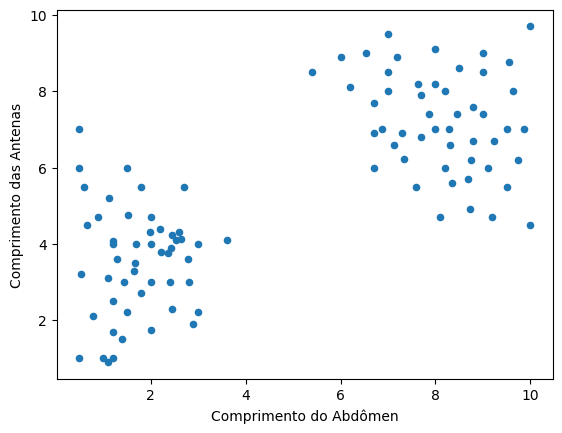

In [10]:
# Criar um gráfico de dispersão
dados.plot.scatter(x='Comprimento do Abdômen', y='Comprimento das Antenas')

# Separando a base de dados em treino e teste

*   **Treino**: É importante que a maior parte dos dados estejam concentrados na parte de treino, pois é nessa parte que irar treinar o modelo e fazer predições mais próximas da realidade.

*  **Teste**: A parte de teste é uma fração dados utilizado para testar a predição do modelo.

In [11]:
from sklearn import *

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
x = dados[['Comprimento do Abdômen', 'Comprimento das Antenas']]

In [14]:
x

,Comprimento do Abdômen,Comprimento das Antenas
0,0.50,7.0
1,0.50,6.0
2,0.60,5.5
3,0.65,4.5
4,0.54,3.2
...,...,...
95,9.75,6.2
96,6.20,8.1
97,9.20,4.7
98,9.10,6.0


In [15]:
y = dados['Espécie']

In [16]:
y

0     Gafanhoto
1     Gafanhoto
2     Gafanhoto
3     Gafanhoto
4     Gafanhoto
        ...    
95    Esperança
96    Esperança
97    Esperança
98    Esperança
99    Esperança
Name: Espécie, Length: 100, dtype: object

In [17]:
# stratify -> realiza um equilibrio na target, ou seja, tanto nas bases de dados de treino e de teste terão
# o número gafanhotos e de esperanças em equilibrio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
list(y_train).count("Gafanhoto")

40

In [19]:
list(y_train).count("Esperança")

40

In [20]:
len(x_train)

80

In [21]:
len(x_test)

20

In [22]:
x_train

,Comprimento do Abdômen,Comprimento das Antenas
65,6.70,6.9
2,0.60,5.5
10,1.40,1.5
16,2.00,4.0
18,1.20,2.5
...,...,...
67,7.00,8.5
86,8.73,4.9
35,1.79,2.7
71,8.20,8.0


In [23]:
y_train

65    Esperança
2     Gafanhoto
10    Gafanhoto
16    Gafanhoto
18    Gafanhoto
        ...    
67    Esperança
86    Esperança
35    Gafanhoto
71    Esperança
75    Esperança
Name: Espécie, Length: 80, dtype: object

# KNN - k-nearest neighbors

É um algoritmo de aprendizado de máquina supervisionado usado tanto para classificação quanto para regressão. Ele mede a distanância entre pontos para poder fazer classificações de dados.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Iniciando o modelo
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

In [30]:
# Treinando o modelo
modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
# Fazendo uma predição
modelo_classificador.predict([[8, 6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Esperança'], dtype=object)

## Métricas de validação

Métricas de validação são medidas para avaliar o desempenho do modelo em fazer previsões.

In [32]:
y_predito = modelo_classificador.predict(x_test)

In [33]:
# accuracy_score é uma métrica que mede o porcentual de acerto do modelo
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_true=y_test, y_pred=y_predito)

1.0

# Observação

O accuracy_score do modelo resultou em 1.0, que seria 100%. Nesse caso como os exemplos são bem simples é normal dar 100% no resultado, porém na maioria dos casos é importante ficar desconfiado de resultados próxmos ao 100%. É possível que nesse modelo tenha decorado os resultados, isso significa que ele não conseguiria avaliar bem dados mais generalizados. Quando o modelo se ajusta muito bem ao dados de teste isso se chama **Sobreajuste (Overfitting)**.